# Final Project - Clustering Volcanoes according to eruption time

The 'eruptions.csv' file contains 10000 rows of volcanic activity information. The first column is the duration of the eruption, and the second is time between two eruptions. Clustering should be applied on the entire dataset. 

### Perform the following operations:
1. Read the dataset in python using pandas. Plot a scatter of the two columns. 
2. Run the Kmeans algorithm on this dataset(using random). Choose the appropriate number of clusters for this data. What information can you gain from this clustering?
3. Plot the output of Kmeans, colored according to clusters and obtained centroids. 
5. For each cluster plot the line from the centroid to the farthest point in the cluster. 
6. Find out all the points in the cluster which have a distance greater than the mean of the cluster. Plot a graph showing them in different color. 
6. What is average distance of each cluster? (From the centroid to all points in the cluster)
7. For the following points, find out which cluster they fall in?  
dur_eruptions = 2.5, 3.0, 3.2, 4.5, 5.0, 1.5  
wait_time_btn_eruptions = 70, 55, 70, 80, 70, 100  
Plot these points in separate markers & color along with the clusters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [2]:
df = pd.read_csv('./data/eruptions.csv')
df.head()

,dur_eruptions,wait_time_btn_eruptions
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


Text(0.5,1,'Volcanic Eruption')

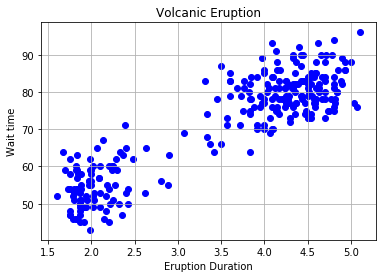

In [3]:
plt.scatter(df['dur_eruptions'],df['wait_time_btn_eruptions'],color='b')
plt.grid(True)
plt.xlabel('Eruption Duration')
plt.ylabel('Wait time')
plt.title('Volcanic Eruption')

In [13]:
kmeans = KMeans(n_clusters=2,init='random')

In [14]:
model = kmeans.fit(df)
y_kmeans = model.predict(df)
c = kmeans.cluster_centers_
print('Clusters are: ',c)

Clusters are:  [[ 2.09433    54.75      ]
 [ 4.29793023 80.28488372]]


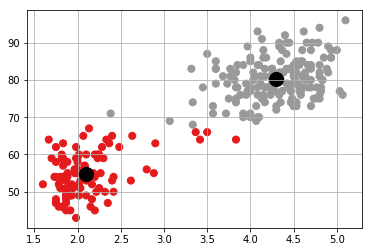

In [15]:
plt.scatter(df['dur_eruptions'],df['wait_time_btn_eruptions'],c=y_kmeans,s=50,cmap='Set1')
plt.grid()
plt.scatter(c[:,0],c[:,1],s=200,c='black')

In [17]:
c1_centroid = c[0]
c2_centroid = c[1]
cluster1_points = df[y_kmeans==0]
cluster2_points = df[y_kmeans==1]
import numpy as np
c1_distances = cluster1_points.apply(lambda x:np.sqrt((c1_centroid[0]-x[0])**2+(c1_centroid[1]-x[1])**2),axis=1)
c2_distances = cluster2_points.apply(lambda x:np.sqrt((c2_centroid[0]-x[0])**2+(c2_centroid[1]-x[1])**2),axis=1)
print('Mean distance of cluster 1:',c1_distances.mean())
print('Mean distance of cluster 2:',c2_distances.mean())

Mean distance of cluster 1: 4.899078763179232
Mean distance of cluster 2: 4.556493732778597


In [29]:
dur_eruptions = [2.5, 3.0, 3.2, 4.5, 5.0, 1.5]
wait_time = [70, 55, 70, 80, 70, 100]
d = {'dur':dur_eruptions,'wait':wait_time}
df1 = pd.DataFrame(data = d)
df1.head()
y_k = model.predict(df1)

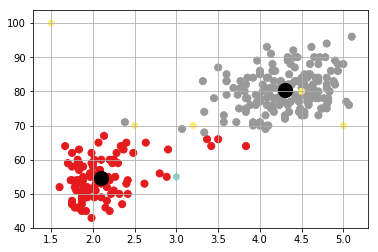

In [31]:
plt.scatter(df['dur_eruptions'],df['wait_time_btn_eruptions'],c=y_kmeans,s=50,cmap='Set1')
plt.grid()
plt.scatter(c[:,0],c[:,1],s=200,c='black')
plt.scatter(dur_eruptions,wait_time,cmap='Set3',c=y_k)